In [4]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
expdir = "/homes_unix/jlegrand/data/Memento/output/prediction"
exppath = Path(expdir) / "k-3_feat-series_experimental-True_atlas-ncomponents-10_nregions-39_gsr-False_winsize-24_batchsize-64_niter-10_stamp-2024-07-24-14:18"

cv_results = pd.read_csv(Path(exppath) / "cv_results.csv", index_col=0)

In [5]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_module__channel_func,param_module__num_conv_blocks,param_module__num_fc_blocks,param_optimizer__lr,param_optimizer__weight_decay,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,128.878335,68.076874,1.071347,0.540204,<function default_channel_func at 0x7b31ad1fa8e0>,2,1,0.036413,0.000018,OrderedDict({'module__channel_func': 'default_...,0.305739,0.308421,0.327874,0.307352,0.383716,0.326620,0.029665,1
3,226.992673,84.389606,0.941715,0.378098,<function default_channel_func at 0x7b31ad1fa8e0>,3,1,0.000103,0.003136,OrderedDict({'module__channel_func': <function...,0.293947,0.339268,0.321225,0.335932,0.320193,0.322113,0.016019,2
9,73.963216,27.148432,0.970609,0.509167,<function fast_increase at 0x7b31ad1fa840>,3,1,0.005527,0.001979,OrderedDict({'module__channel_func': <function...,0.293514,0.345041,0.325973,0.325415,0.274989,0.312987,0.025194,3
2,98.998449,33.325980,0.788996,0.350341,<function slow_increase at 0x7b31ad1fa7a0>,2,2,0.001243,0.004122,OrderedDict({'module__channel_func': <function...,0.288187,0.308547,0.328372,0.320248,0.314160,0.311903,0.013562,4
4,94.776117,37.622830,0.847314,0.409510,<function default_channel_func at 0x7b31ad1fa8e0>,3,1,0.000052,0.039131,OrderedDict({'module__channel_func': <function...,0.327870,0.341004,0.326014,0.248629,0.279908,0.304685,0.034836,5
0,149.774756,57.692046,0.940566,0.455918,<function default_channel_func at 0x7b31ad1fa8e0>,4,2,0.000082,0.010711,OrderedDict({'module__channel_func': <function...,0.311756,0.325978,0.325893,0.277203,0.267936,0.301753,0.024560,6
5,76.934276,21.943245,0.865023,0.415647,<function fast_increase at 0x7b31ad1fa840>,2,1,0.060689,0.000902,OrderedDict({'module__channel_func': <function...,0.288643,0.344327,0.272971,0.285326,0.310522,0.300358,0.025099,7
7,152.968725,15.126065,1.175261,0.752807,<function fast_increase at 0x7b31ad1fa840>,4,1,0.000638,0.000231,OrderedDict({'module__channel_func': <function...,0.272636,0.296255,0.294307,0.328758,0.284856,0.295362,0.018676,8
8,167.635642,28.064025,0.865977,0.366965,<function initial_bump at 0x7b31ad1b1800>,4,2,0.000374,0.000034,OrderedDict({'module__channel_func': <function...,0.339900,0.319002,0.280539,0.226854,0.280727,0.289404,0.038710,9
1,72.969768,11.004947,1.013241,0.527058,<function initial_bump at 0x7b31ad1b1800>,4,2,0.088453,0.020888,OrderedDict({'module__channel_func': <function...,0.153825,0.220491,0.216401,0.213486,0.170545,0.194950,0.027360,10


Batch size is not so important, set around 200?


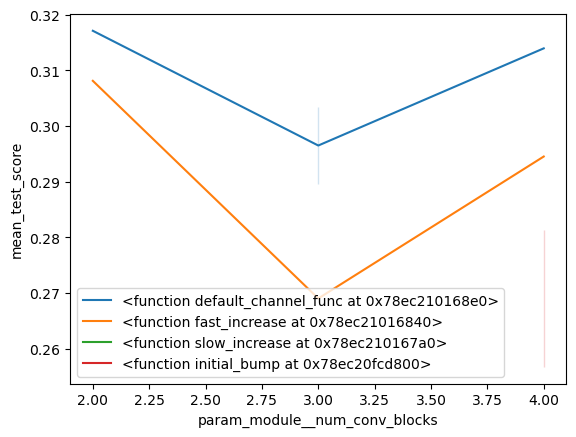

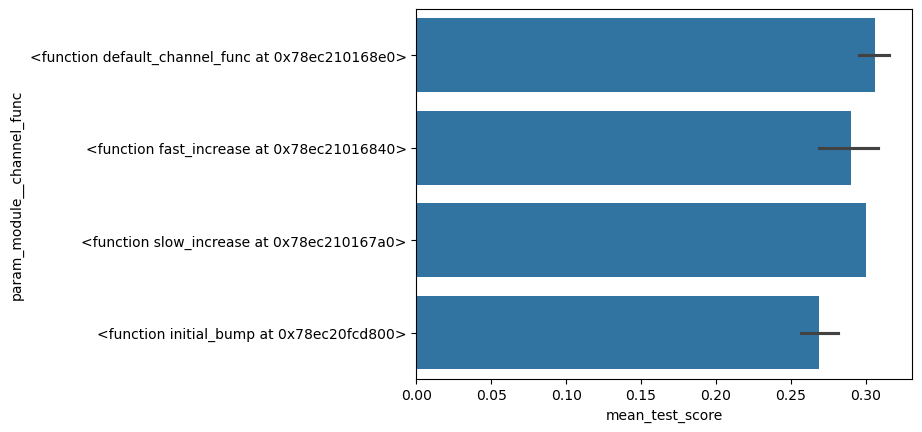

In [3]:
import seaborn as sns
sns.lineplot(cv_results, x="param_module__num_conv_blocks", y="mean_test_score", hue="param_module__channel_func")
plt.legend(loc="lower left")
plt.show()
sns.barplot(cv_results, y="param_module__channel_func", x="mean_test_score")
plt.show()

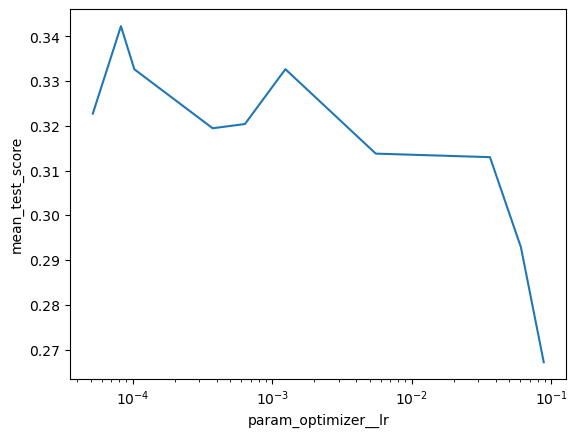

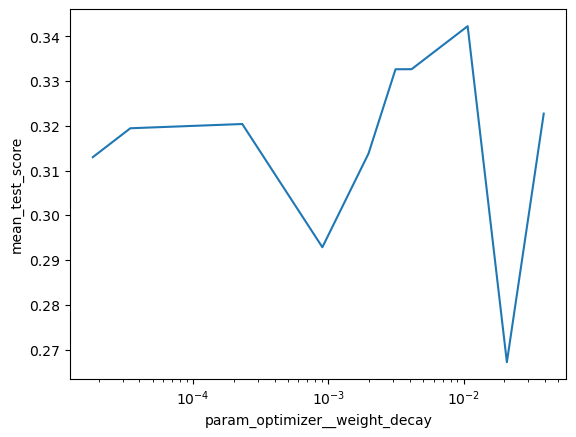

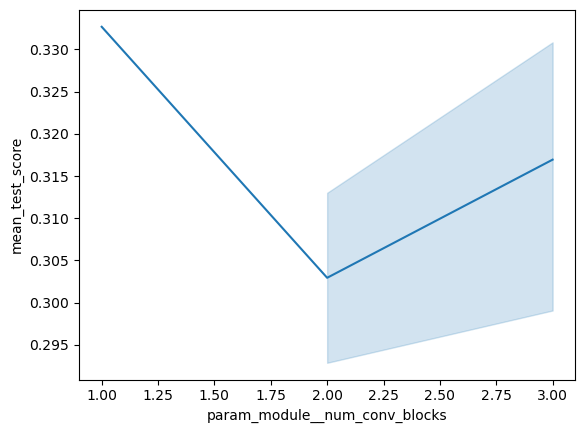

In [4]:
#sns.barplot(cv_results, y="param_module__channel_func", x="mean_test_score")
#plt.show()
g = sns.lineplot(cv_results, x="param_optimizer__lr", y="mean_test_score")
g.set(xscale='log')
plt.show()
g = sns.lineplot(cv_results, x="param_optimizer__weight_decay", y="mean_test_score")
g.set(xscale='log')
plt.show()
g = sns.lineplot(cv_results, x="param_module__num_conv_blocks", y="mean_test_score")
plt.show()